## SVM 모델 학습 및 성능 평가 

#####  학습/평가 데이터 분리

In [ ]:
# 측정 데이터와 레이블(정답) 분리
X = df.iloc[:, 1:5].values
y = df.iloc[:, -1:].values
y = np.where(y =='OK',1,0)
y = y.ravel() # 레이블을 1차원으로 변경함.
print(X.shape, y.shape)

(9383, 4) (9383,)


In [ ]:
# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))
print(len(y_test[y_test == 1]))
print(len(y_test[y_test == 0]))

5586
982
2382
433


In [ ]:
new_y_train = y_train[y_train == 1][:len(y_train[y_train == 0])]
new_y_train = np.concatenate([new_y_train, y_train[y_train == 0]])
new_y_train

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
new_X_train = X_train[y_train == 1][:len(y_train[y_train == 0])]
new_X_train = np.concatenate([new_X_train, X_train[y_train == 0]])
new_X_train

array([[  0.,   0., 526., 584.],
       [  0.,   0., 571., 526.],
       [  0.,   0., 294., 314.],
       ...,
       [  0.,   0., 581., 580.],
       [  1.,   1., 521., 303.],
       [  0.,   0., 558., 573.]])

##### 모델 성능 평가 - 1) 분류성능평가지표

> 정량평가: 오차행렬, 정확도, 정밀도, 재현율, F1 score, AUC 살펴보기

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [ ]:
def get_clf_eval(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도: {0: .4f}, 정밀도: {1: .4f}, 재현율: {2: .4f}, F1: {3: .4f}, AUC:{4: .4f}'.format(accuracy, precision, recall, f1, roc_auc))

> 정성평가: 그래프 살펴보기

In [ ]:
import matplotlib.pyplot as plt
def draw_graph(y_test=None, pred=None):
  plt.figure(figsize=(40, 9))
  plt.plot(y_test, 'b', label = 'actual')
  plt.plot(pred, 'r', label = 'prediction')
  plt.legend()
  plt.show()

  # 따로 보기
  # plt.figure(figsize = (30,6)) # Plotting
  # plt.plot(y_test, 'b', label = 'actual')
  # plt.legend()
  # plt.show()
  # plt.figure(figsize=(30, 6))
  # plt.plot(pred, 'r', label = 'prediction')
  # plt.legend()
  # plt.show()

##### 모델 성능 평가 -2) ROC curve와 case별로 살펴보기 

In [ ]:
def get_eval_2(y_test=None, pred=None):
  confusion = confusion_matrix(y_test, pred)
  TN = confusion[0][0]
  FP = confusion[0][1]
  FN = confusion[1][0]
  TP = confusion[1][1]
  print("📌실제 불량일 때 불량으로 판별할 확률\n= P(실제불량)∩P(에측불량)/P(실제불량): {:.4f}".format(TN/(TN+FP)))
  #print("📌실제 불량일 때 양품으로 판별할 확률\n= P(실제불량)∩P(에측양품)/P(실제불량): {:.4f}".format(FP/(TN+FP)))
  #print("📌실제 양품일 때 불량으로 판별할 확률\n= P(실제양품)∩P(에측불량)/P(실제양품): {:.4f}".format(FN/(FN+TP)))
  print("📌실제 양품일 때 양품으로 판별할 확률\n= P(실제양품)∩P(에측양품)/P(실제양품): {:.4f}".format(TP/(FN+TP)))

  roc_auc = roc_auc_score(y_test, pred)
  print('ROC_AUC:{:.4f}'.format(roc_auc))
  return(TN/(TN+FP),TP/(FN+TP),roc_auc)

##### 모델 학습 및 성능 평가

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
Pa_arr = []
Pd_arr = []
Proc_arr = []
#iteration = np.arange(0.01,0.12,0.02)
#for d in iteration:
for i in range(2,15):
  polynomial_svm_clf = Pipeline([
      ("poly_features", PolynomialFeatures(degree=i)),
      ("scaler", StandardScaler()),
      ("svm_clf", LinearSVC(C=10, loss="hinge"))
  ])
  polynomial_svm_clf.fit(X_train, y_train)
  sv_pred = polynomial_svm_clf.predict(X_test)
  print("---------------------degree가",i,"일 때-----------------------")
  get_clf_eval(y_test, sv_pred)
  Pa, Pd, Proc = get_eval_2(y_test, sv_pred)
  Pa_arr.append(Pa)
  Pd_arr.append(Pd)
  Proc_arr.append(Proc)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 2 일 때-----------------------
오차 행렬
[[ 393   40]
 [  18 2364]]
정확도:  0.9794, 정밀도:  0.9834, 재현율:  0.9924, F1:  0.9879, AUC: 0.9500
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9076
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9924
ROC_AUC:0.9500


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 3 일 때-----------------------
오차 행렬
[[ 399   34]
 [  17 2365]]
정확도:  0.9819, 정밀도:  0.9858, 재현율:  0.9929, F1:  0.9893, AUC: 0.9572
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9215
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9929
ROC_AUC:0.9572


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 4 일 때-----------------------
오차 행렬
[[ 397   36]
 [   3 2379]]
정확도:  0.9861, 정밀도:  0.9851, 재현율:  0.9987, F1:  0.9919, AUC: 0.9578
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9169
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9987
ROC_AUC:0.9578


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 5 일 때-----------------------
오차 행렬
[[ 400   33]
 [   1 2381]]
정확도:  0.9879, 정밀도:  0.9863, 재현율:  0.9996, F1:  0.9929, AUC: 0.9617
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9238
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9996
ROC_AUC:0.9617


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 6 일 때-----------------------
오차 행렬
[[ 426    7]
 [  11 2371]]
정확도:  0.9936, 정밀도:  0.9971, 재현율:  0.9954, F1:  0.9962, AUC: 0.9896
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9838
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9954
ROC_AUC:0.9896


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 7 일 때-----------------------
오차 행렬
[[ 422   11]
 [  12 2370]]
정확도:  0.9918, 정밀도:  0.9954, 재현율:  0.9950, F1:  0.9952, AUC: 0.9848
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9746
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9950
ROC_AUC:0.9848


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 8 일 때-----------------------
오차 행렬
[[ 428    5]
 [  16 2366]]
정확도:  0.9925, 정밀도:  0.9979, 재현율:  0.9933, F1:  0.9956, AUC: 0.9909
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9885
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9933
ROC_AUC:0.9909


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 9 일 때-----------------------
오차 행렬
[[ 424    9]
 [  45 2337]]
정확도:  0.9808, 정밀도:  0.9962, 재현율:  0.9811, F1:  0.9886, AUC: 0.9802
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9792
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9811
ROC_AUC:0.9802


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 10 일 때-----------------------
오차 행렬
[[ 400   33]
 [   6 2376]]
정확도:  0.9861, 정밀도:  0.9863, 재현율:  0.9975, F1:  0.9919, AUC: 0.9606
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9238
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9975
ROC_AUC:0.9606


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 11 일 때-----------------------
오차 행렬
[[ 415   18]
 [   2 2380]]
정확도:  0.9929, 정밀도:  0.9925, 재현율:  0.9992, F1:  0.9958, AUC: 0.9788
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9584
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9992
ROC_AUC:0.9788


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 12 일 때-----------------------
오차 행렬
[[ 421   12]
 [   3 2379]]
정확도:  0.9947, 정밀도:  0.9950, 재현율:  0.9987, F1:  0.9969, AUC: 0.9855
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9723
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9987
ROC_AUC:0.9855


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---------------------degree가 13 일 때-----------------------
오차 행렬
[[ 418   15]
 [   2 2380]]
정확도:  0.9940, 정밀도:  0.9937, 재현율:  0.9992, F1:  0.9964, AUC: 0.9823
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9654
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9992
ROC_AUC:0.9823
---------------------degree가 14 일 때-----------------------
오차 행렬
[[ 420   13]
 [   3 2379]]
정확도:  0.9943, 정밀도:  0.9946, 재현율:  0.9987, F1:  0.9966, AUC: 0.9844
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9700
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9987
ROC_AUC:0.9844


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


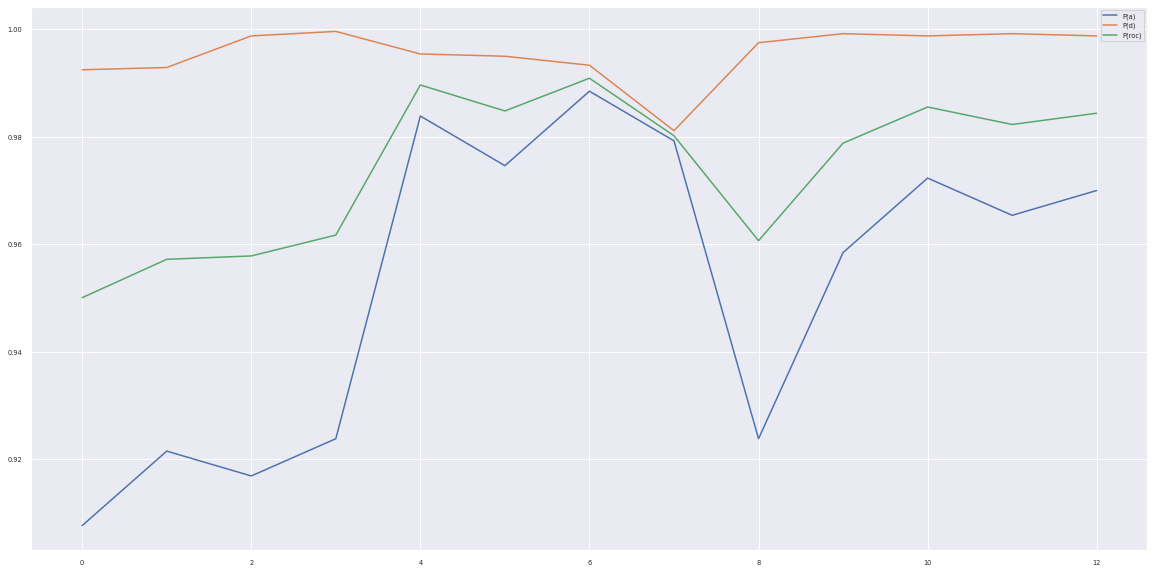

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(20,10))
plt.plot(Pa_arr, label = 'P(a)')
plt.plot(Pd_arr, label = 'P(d)')
plt.plot(Proc_arr, label = 'P(roc)')
plt.legend()

In [ ]:
# 선형분리
from sklearn import svm
sv = svm.SVC(kernel = 'linear', C=10, max_iter = 10000)
result = sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
get_clf_eval(y_test, sv_pred)
get_eval_2(y_test, sv_pred)

오차 행렬
[[ 189  244]
 [ 798 1584]]
정확도:  0.6298, 정밀도:  0.8665, 재현율:  0.6650, F1:  0.7525, AUC: 0.5507
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.4365
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.6650
ROC_AUC:0.5507


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


(0.43648960739030024, 0.6649874055415617, 0.5507385064659309)

In [ ]:
# 선형분리
from sklearn import svm
sv = svm.SVC(kernel = 'linear', C=10, max_iter = 10000)
result = sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
get_clf_eval(y_test, sv_pred)
get_eval_2(y_test, sv_pred)

오차 행렬
[[ 189  244]
 [ 798 1584]]
정확도:  0.6298, 정밀도:  0.8665, 재현율:  0.6650, F1:  0.7525, AUC: 0.5507
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.4365
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.6650
ROC_AUC:0.5507


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


(0.43648960739030024, 0.6649874055415617, 0.5507385064659309)

In [ ]:
# 그래프 그려보기기
plt.show()

In [ ]:
# 비선형분리
from sklearn import svm
sv = svm.SVC(kernel = 'rbf', gamma = 'auto', C=10, max_iter = 10000)
result = sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)
get_clf_eval(y_test, sv_pred)
get_eval_2(y_test, sv_pred)
# 그래프 그려보기

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


오차 행렬
[[ 377   56]
 [   6 2376]]
정확도:  0.9780, 정밀도:  0.9770, 재현율:  0.9975, F1:  0.9871, AUC: 0.9341
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.8707
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9975
ROC_AUC:0.9341


(0.8706697459584296, 0.9974811083123426, 0.9340754271353862)

In [ ]:
# 비선형분리
from sklearn import svm
sv = svm.SVC(kernel = 'rbf', gamma = 'auto', C=10, max_iter = 10000)
result = sv.fit(X_train_2, y_train_2)
sv_pred = sv.predict(X_test_2)
get_clf_eval(y_test_2, sv_pred)
get_eval_2(y_test_2, sv_pred)
# 그래프 그려보기

오차 행렬
[[ 432   21]
 [  13 2349]]
정확도:  0.9879, 정밀도:  0.9911, 재현율:  0.9945, F1:  0.9928, AUC: 0.9741
📌실제 불량일 때 불량으로 판별할 확률
= P(실제불량)∩P(에측불량)/P(실제불량): 0.9536
📌실제 양품일 때 양품으로 판별할 확률
= P(실제양품)∩P(에측양품)/P(실제양품): 0.9945
ROC_AUC:0.9741


(0.9536423841059603, 0.9944961896697714, 0.9740692868878658)

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'rbf', max_iter = 10000)

# 교차검증

scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv =5))

print('교차검증 평균: ', scores.mean())

# X_train_2, X_test_2, y_train_2, y_test_2

교차검증 평균:  0.9089529711664527
